# This is a test project to predect the daily sales for 3A bicks shop from the sales data of year 2016

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [2]:
three_a = pd.read_csv("SalesT2016.csv")
three_a.head()

,Category,Product,Day,Month,Quantity,SalesVale
0,Accessories,Helmets,1,1,3,28.05
1,Clothing,Gloves,1,1,1,12.75
2,Clothing,Gloves,1,1,3,39.60
3,Accessories,Lights,1,1,3,18.06
4,Clothing,Caps,1,1,2,23.40


In [3]:
three_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Category   1048575 non-null  object 
 1   Product    1048575 non-null  object 
 2   Day        1048575 non-null  int64  
 3   Month      1048575 non-null  int64  
 4   Quantity   1048575 non-null  int64  
 5   SalesVale  1048575 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 48.0+ MB


In [4]:
three_a.shape

(1048575, 6)

In [5]:
three_a.describe()

,Day,Month,Quantity,SalesVale
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.576078e+01,6.508716e+00,1.999313e+00,6.044574e+01
std,8.814452e+00,3.453660e+00,8.163437e-01,1.247335e+02
min,1.000000e+00,1.000000e+00,1.000000e+00,2.550000e+00
25%,8.000000e+00,4.000000e+00,1.000000e+00,9.570000e+00
50%,1.600000e+01,7.000000e+00,2.000000e+00,1.720000e+01
75%,2.300000e+01,1.000000e+01,3.000000e+00,3.060000e+01
max,3.100000e+01,1.200000e+01,3.000000e+00,6.642000e+02


In [6]:
three_a.isnull().sum()

Category     0
Product      0
Day          0
Month        0
Quantity     0
SalesVale    0
dtype: int64

In [7]:
# Observing Correlation between Columns
three_a[['Category','Product','Day','Month','Quantity']].corr()

,Day,Month,Quantity
Day,1.000000,0.006332,-0.000069
Month,0.006332,1.000000,0.000122
Quantity,-0.000069,0.000122,1.000000


<AxesSubplot:>

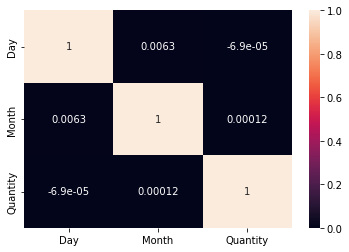

In [8]:
sns.heatmap(three_a[['Day','Month','Quantity']].corr(), annot=True)

In [9]:
# Since the relationship between the relevant not strong, so I cannot benefit from this by removing one of them

# Encoding Data

In [10]:
# Now I have to encoding the data to numeric to build my model by using dummies function for Category column

In [11]:
dummies=pd.get_dummies(three_a.Category,drop_first=True)

In [12]:
three_a=pd.concat([three_a,dummies],axis=1)
three_a

,Category,Product,Day,Month,Quantity,SalesVale,Bikes,Clothing,Components
0,Accessories,Helmets,1,1,3,28.05,0,0,0
1,Clothing,Gloves,1,1,1,12.75,0,1,0
2,Clothing,Gloves,1,1,3,39.60,0,1,0
3,Accessories,Lights,1,1,3,18.06,0,0,0
4,Clothing,Caps,1,1,2,23.40,0,1,0
...,...,...,...,...,...,...,...,...,...
1048570,Clothing,Caps,31,12,1,11.57,0,1,0
1048571,Bikes,Touring Bikes,31,12,2,221.00,1,0,0
1048572,Clothing,Caps,31,12,3,35.10,0,1,0
1048573,Components,Wheels,31,12,2,7.04,0,0,1


In [13]:
three_a.drop(["Category"],axis=1,inplace=True)
three_a

,Product,Day,Month,Quantity,SalesVale,Bikes,Clothing,Components
0,Helmets,1,1,3,28.05,0,0,0
1,Gloves,1,1,1,12.75,0,1,0
2,Gloves,1,1,3,39.60,0,1,0
3,Lights,1,1,3,18.06,0,0,0
4,Caps,1,1,2,23.40,0,1,0
...,...,...,...,...,...,...,...,...
1048570,Caps,31,12,1,11.57,0,1,0
1048571,Touring Bikes,31,12,2,221.00,1,0,0
1048572,Caps,31,12,3,35.10,0,1,0
1048573,Wheels,31,12,2,7.04,0,0,1


In [14]:
# Now I have to do the same with Product column

In [15]:
dummies1=pd.get_dummies(three_a.Product,drop_first=True)

In [16]:
three_a=pd.concat([three_a,dummies1],axis=1)
three_a

,Product,Day,Month,Quantity,SalesVale,Bikes,Clothing,Components,Bike Racks,Bottom Brackets,...,Pumps,Road Bikes,Saddles,Shorts,Socks,Tights,Tires and Tubes,Touring Bikes,Vests,Wheels
0,Helmets,1,1,3,28.05,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Gloves,1,1,1,12.75,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Gloves,1,1,3,39.60,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Lights,1,1,3,18.06,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Caps,1,1,2,23.40,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,Caps,31,12,1,11.57,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048571,Touring Bikes,31,12,2,221.00,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1048572,Caps,31,12,3,35.10,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048573,Wheels,31,12,2,7.04,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [17]:
three_a.drop(["Product"],axis=1,inplace=True)
three_a

,Day,Month,Quantity,SalesVale,Bikes,Clothing,Components,Bike Racks,Bottom Brackets,Brakes,...,Pumps,Road Bikes,Saddles,Shorts,Socks,Tights,Tires and Tubes,Touring Bikes,Vests,Wheels
0,1,1,3,28.05,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,12.75,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,3,39.60,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,3,18.06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,2,23.40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,31,12,1,11.57,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048571,31,12,2,221.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1048572,31,12,3,35.10,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048573,31,12,2,7.04,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Scaling

In [18]:
scale=MinMaxScaler()
three_a[['Day','Month','Quantity']]=scale.fit_transform(three_a[['Day','Month','Quantity']])
three_a

,Day,Month,Quantity,SalesVale,Bikes,Clothing,Components,Bike Racks,Bottom Brackets,Brakes,...,Pumps,Road Bikes,Saddles,Shorts,Socks,Tights,Tires and Tubes,Touring Bikes,Vests,Wheels
0,0.0,0.0,1.0,28.05,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,12.75,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,1.0,39.60,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,1.0,18.06,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.5,23.40,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1.0,1.0,0.0,11.57,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048571,1.0,1.0,0.5,221.00,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1048572,1.0,1.0,1.0,35.10,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048573,1.0,1.0,0.5,7.04,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Specifying X and Y

In [19]:
y = three_a.iloc[:,3].values

In [20]:
three_a.drop(['SalesVale'],axis=1,inplace=True)
three_a

,Day,Month,Quantity,Bikes,Clothing,Components,Bike Racks,Bottom Brackets,Brakes,Caps,...,Pumps,Road Bikes,Saddles,Shorts,Socks,Tights,Tires and Tubes,Touring Bikes,Vests,Wheels
0,0.0,0.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,1.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,0.5,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1.0,1.0,0.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1048571,1.0,1.0,0.5,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1048572,1.0,1.0,1.0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1048573,1.0,1.0,0.5,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
x=three_a.iloc[::].values
x.shape

(1048575, 30)

# Splitting Database into train and test

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

# Fitting Model to training Set

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred=lin_reg.predict(x_test)
y_pred

array([ 49.234375  , 359.80078125, 389.78125   , ...,  -8.84765625,
         5.4921875 , 359.71484375])

# Finding Coefficients and Intercepts

In [25]:
# coefficients
print(lin_reg.coef_)

[ 2.06202620e-01  3.19990775e-02  6.02365819e+01 -1.65203116e+12
 -2.26401769e+13 -3.04777788e+13 -2.26401769e+13  7.83760186e+12
  7.83760186e+12  1.61485173e+00 -2.09881458e+13  7.83760186e+12
  5.27321154e+00  7.83760186e+12 -2.26401769e+13  5.27213664e+00
 -2.26401769e+13 -2.26401769e+13 -2.09881458e+13  7.83760186e+12
 -2.26401769e+13 -2.09881458e+13  7.83760186e+12 -1.02760180e-01
  1.56358044e+00  1.14031488e-01 -2.26401769e+13 -2.09881458e+13
 -1.89761395e+00  7.83760186e+12]


In [26]:
# intercepts
print(lin_reg.intercept_)

22640176947566.305


# Evaluating the Model

In [27]:
r2_score(y_test,y_pred)

0.8631090485892785

# Add new data for sales year 2017 and predict the sales_value for every day

In [28]:
sales_value=pd.read_csv("SalesT2017.csv")

In [29]:
sales_value

,Category,Product,Day,Month,Quantity
0,Bikes,Cargo Bike,1,1,1
1,Bikes,Cargo Bike,1,1,2
2,Bikes,Cargo Bike,1,1,1
3,Accessories,Helmets,1,1,3
4,Accessories,Helmets,1,1,1
...,...,...,...,...,...
1048570,Accessories,Tires and Tubes,31,12,3
1048571,Components,Brakes,31,12,3
1048572,Bikes,Road Bikes,31,12,1
1048573,Components,Handlebars,31,12,1


In [30]:
dummies=pd.get_dummies(sales_value.Category,drop_first=True)
sales_value=pd.concat([sales_value,dummies],axis=1)
sales_value.drop(["Category"],axis=1,inplace=True)
dummies1=pd.get_dummies(sales_value.Product,drop_first=True)
sales_value=pd.concat([sales_value,dummies1],axis=1)
sales_value.drop(["Product"],axis=1,inplace=True)
sales_value

,Day,Month,Quantity,Bikes,Clothing,Components,Bike Racks,Bottom Brackets,Brakes,Caps,...,Pumps,Road Bikes,Saddles,Shorts,Socks,Tights,Tires and Tubes,Touring Bikes,Vests,Wheels
0,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,31,12,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1048571,31,12,3,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1048572,31,12,1,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1048573,31,12,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
scale=MinMaxScaler()
sales_value[['Day','Month','Quantity']]=scale.fit_transform(sales_value[['Day','Month','Quantity']])

In [32]:
x=three_a.iloc[::].values

In [33]:
y_pred=lin_reg.predict(sales_value)
y_pred

C:\Users\mohamed.aboelela\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([399.31640625, 429.43359375, 399.31640625, ...,  99.5625    ,
       -17.703125  ,  52.90625   ])